In [4]:
# Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  # Added for HTML cleaning
import seaborn as sns

In [5]:
# Define category mapping
CATEGORY_MAP = {
    2: 'site-feedback',
    4: 'general',
    5: 'feature-request',
    6: 'bug-report',
    7: 'feedback',
    8: 'help',
    9: 'showcase',
    11: 'announcements'
}

In [7]:
# Read the bug report data
with open('../data/full_data_2025_02_23_17:27.json', 'r') as f:
    data = json.load(f)

# Create lists to store the extracted data
posts = []

# Process each discussion
for thread in data['discussions']:
    # Discussion-level features (shared across all posts in thread)
    discussion_features = {
        'post_discussion_id': thread.get('id'),
        'post_discussion_title': thread.get('title'),
        'post_discussion_created_at': pd.to_datetime(thread.get('created_at')),
        'post_discussion_views': thread.get('views'),
        'post_discussion_reply_count': thread.get('posts_count'),
        'post_discussion_like_count': thread.get('like_count'),
        'post_discussion_participant_count': thread.get('participant_count'),
        'post_discussion_word_count': float(thread.get('word_count', 0)),
        'post_category_id': thread.get('category_id'),
        'post_category_name': CATEGORY_MAP.get(thread.get('category_id')),
        'post_discussion_tags': thread.get('tags', []),
        'post_discussion_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}",
    }
    
    # Extract tags (up to 4)
    tags = thread.get('tags', [])
    for i in range(4):
        discussion_features[f'tag{i+1}'] = tags[i] if i < len(tags) else None
        
    # Post-level features
    for post in thread.get('post_stream', {}).get('posts', []):
        post_data = {
            **discussion_features,  # Include all discussion features
            'post_id': post.get('id'),
            'post_author': post.get('username'),
            'post_author_id': post.get('user_id'),
            'post_created_at': post.get('created_at'),
            'post_content': BeautifulSoup(post.get('cooked', ''), 'html.parser').get_text(),
            'post_content_raw': post.get('cooked', ''),
            'post_read_count': post.get('reads', 0),
            'post_reply_count': post.get('reply_count', 0),
            'post_number': post.get('post_number'),
            'accepted_answer_post': float(post.get('accepted_answer', False)),
            'post_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}/{post.get('post_number')}",
        }
        posts.append(post_data)
            
df = pd.DataFrame(posts)

# Display basic information about the dataset
print("Dataset Info:")
print(f"Number of discussions: {len(data['discussions'])}")
print(f"Number of posts: {len(df)}")
print("\nDataFrame Head:")
df.head()

Dataset Info:
Number of discussions: 9462
Number of posts: 37194

DataFrame Head:


,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_author,post_author_id,post_created_at,post_content,post_content_raw,post_read_count,post_reply_count,post_number,accepted_answer_post,post_url
0,51067,Update: o3-mini pricing,2025-02-14 20:19:48.080000+00:00,5051,1,25,1,35.0,11,announcements,...,ericzakariasson,12793,2025-02-14T20:19:48.273Z,we’ve updated the pricing for o3-mini to be li...,<p>we’ve updated the pricing for <code>o3-mini...,550,0,1,0.0,https://forum.cursor.com/t/update-o3-mini-pric...
1,29449,Long context mode gone in newest update,2024-11-24 11:40:28.870000+00:00,2853,59,280,42,3534.0,6,bug-report,...,Dryec,14170,2024-11-24T11:40:28.914Z,I was using the long context mode quite a lot ...,<p>I was using the long context mode quite a l...,289,0,1,0.0,https://forum.cursor.com/t/long-context-mode-g...
2,29449,Long context mode gone in newest update,2024-11-24 11:40:28.870000+00:00,2853,59,280,42,3534.0,6,bug-report,...,saeedmahmud,574,2024-11-24T12:11:19.442Z,Pro user here. I’ve noticed it’s gone for me a...,<p>Pro user here. I’ve noticed it’s gone for m...,284,0,2,0.0,https://forum.cursor.com/t/long-context-mode-g...
3,29449,Long context mode gone in newest update,2024-11-24 11:40:28.870000+00:00,2853,59,280,42,3534.0,6,bug-report,...,mtf,952,2024-11-24T15:17:38.616Z,Missing it too…,<p>Missing it too…</p>,278,0,4,0.0,https://forum.cursor.com/t/long-context-mode-g...
4,29449,Long context mode gone in newest update,2024-11-24 11:40:28.870000+00:00,2853,59,280,42,3534.0,6,bug-report,...,fun_strange,1646,2024-11-24T22:37:22.014Z,Without Long Context Cursor would lose its use...,<p>Without Long Context Cursor would lose its ...,259,0,5,0.0,https://forum.cursor.com/t/long-context-mode-g...


In [8]:
# Print summary stats
print("=== Dataset Summary ===")
print(f"Total posts: {len(df)}")
print(f"Total discussions: {df['post_discussion_id'].nunique()}")
print(f"Total users: {df['post_author_id'].nunique()}\n")
print(f"Date range: {df['post_created_at'].min()} to {df['post_created_at'].max()}")

=== Dataset Summary ===
Total posts: 37194
Total discussions: 9401
Total users: 9885

Date range: 2023-08-21T22:09:03.673Z to 2025-02-23T23:43:36.361Z


### Sentiment Analysis

Using Twitter-roBERTa-base for sentiment analysis, we generated a post_sentiment label (negative, positive, neutral) and post_sentiment_score confidence score for each post.

In [9]:
from transformers import pipeline
import torch
from tqdm.notebook import tqdm

def get_sentiment_batch(texts, batch_size=32, max_length=512):
    """
    Analyze sentiment of texts in batches using CardiffNLP Twitter RoBERTa model.
    Args:
        texts: List of texts to analyze
        batch_size: Number of texts to process at once
        max_length: Maximum sequence length (will truncate longer sequences)
    Returns: List of dictionaries with sentiment scores
    """
    # Initialize the model (will download on first run)
    sentiment_task = pipeline(
        "sentiment-analysis",
        model="cardiffnlp/twitter-roberta-base-sentiment-latest",
        tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest",
        device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
        truncation=True,
        max_length=max_length
    )
    
    results = []
    # Process in batches with progress bar
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing sentiments"):
        batch = texts[i:i + batch_size]
        # Clean text
        batch = [
            ' '.join([t if not t.startswith('@') else '@user' for t in str(text).split()])[:max_length] 
            for text in batch
        ]
        batch = [
            ' '.join([t if not t.startswith('http') else 'http' for t in text.split()])[:max_length]
            for text in batch
        ]
        
        try:
            batch_results = sentiment_task(batch)
            results.extend(batch_results)
        except Exception as e:
            print(f"Error in batch {i}: {e}")
            # Add neutral sentiment for failed items
            results.extend([{'label': 'neutral', 'score': 0.5} for _ in range(len(batch))])
                
    return results

# Apply optimized sentiment analysis
print("Analyzing sentiments with batching and truncation...")
df['sentiment'] = get_sentiment_batch(df['post_content'].tolist())

# Extract sentiment labels and scores
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

Analyzing sentiments with batching and truncation...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Analyzing sentiments:   0%|          | 0/1163 [00:00<?, ?it/s]


Sentiment Distribution:
sentiment_label
neutral     18952
negative    11796
positive     6446
Name: count, dtype: int64


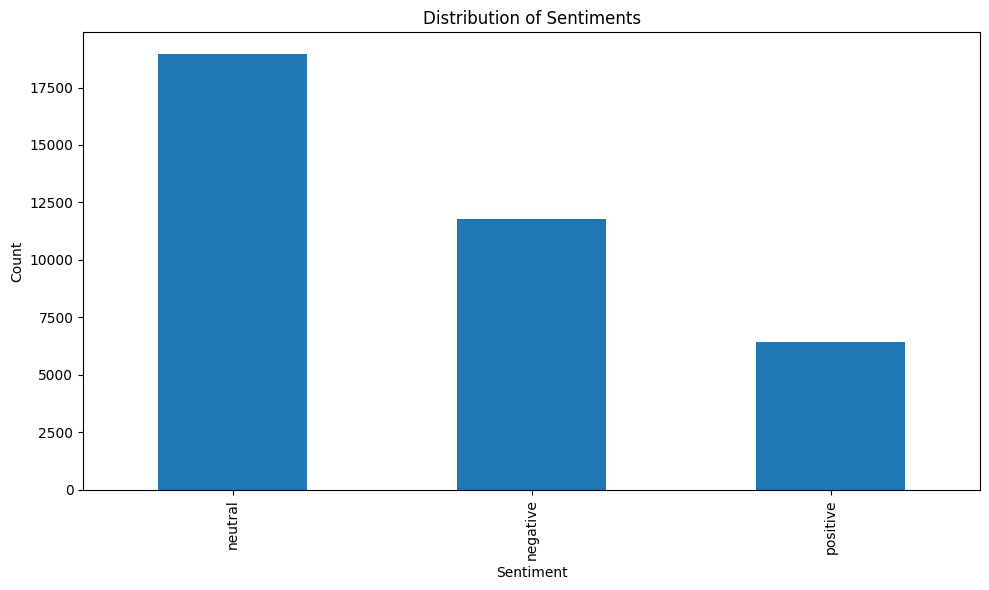

In [13]:

# Print sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

# Visualize results
plt.figure(figsize=(10, 6))
df['sentiment_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
# Get top and bottom posts by sentiment
print("\n=== Top 5 Most Positive Discussions ===")
top_posts = df.groupby('post_discussion_title').agg({
    'sentiment_score': 'mean',
    'post_discussion_views': 'first',
    'post_discussion_reply_count': 'first'
}).sort_values('sentiment_score', ascending=False).head(5)

print(top_posts.to_string())

print("\n=== Top 5 Most Negative Discussions ===")
bottom_posts = df.groupby('post_discussion_title').agg({
    'sentiment_score': 'mean',
    'post_discussion_views': 'first',
    'post_discussion_reply_count': 'first'
}).sort_values('sentiment_score', ascending=True).head(5)

print(bottom_posts.to_string())


=== Top 5 Most Positive Discussions ===
                                                                                               sentiment_score  post_discussion_views  post_discussion_reply_count
post_discussion_title                                                                                                                                             
I stopped starting my coding days with checking Cursor forum. Good job with the latest patch!         0.984200                    234                            1
Short introduction - Hello folks                                                                      0.983756                     59                            1
Appreciation feedback                                                                                 0.983639                     61                            4
Joining Cursor as an SDE                                                                              0.983206                    229           

In [18]:
# Create cross-tabulation using category_id
sentiment_by_category = pd.crosstab(
    index=df['post_category_name'],
    columns=df['sentiment_label'],
    normalize='index'  # This normalizes by row (category)
).round(6)

print("Sentiment Distribution by Category Name:")
print(sentiment_by_category)

Sentiment Distribution by Category Name:
sentiment_label     negative   neutral  positive
post_category_name                              
announcements       0.000000  1.000000  0.000000
bug-report          0.412713  0.481025  0.106262
feature-request     0.163103  0.486020  0.350877
feedback            0.335683  0.434361  0.229956
general             0.303986  0.528420  0.167594
help                0.232713  0.580906  0.186381
showcase            0.097421  0.415473  0.487106
site-feedback       0.209677  0.548387  0.241935


### Vector Embeddings

For calculating vector embeddings, [Nomic Embed-Text v1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5) was ran locally with the help of [text-embeddings-inference](https://github.com/huggingface/text-embeddings-inference). Because of it's Matryoshka resizable nature, it's possible to use these embeddings in a bunch of future applications.

Nomic Embed v1.5 was largely selected due to it's large context length.

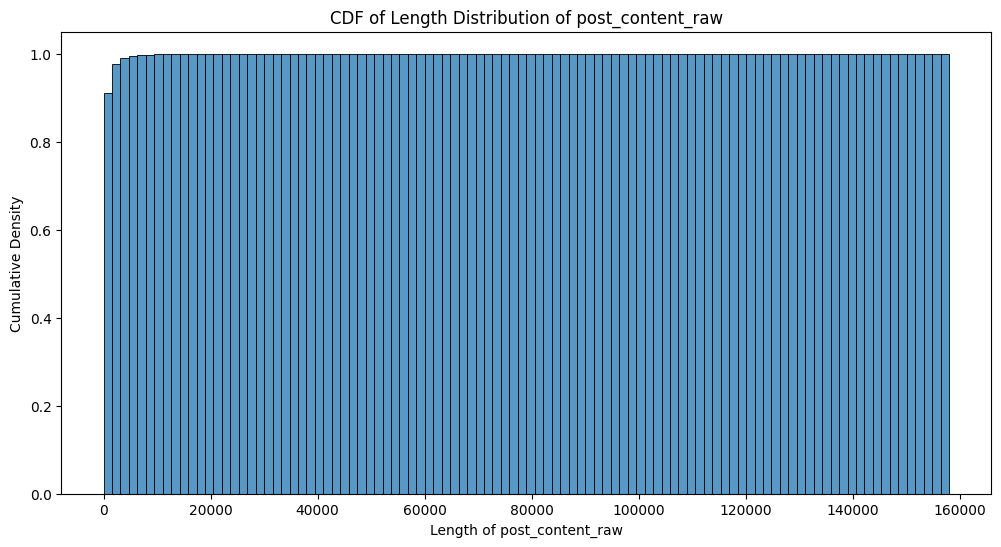

Generating embeddings... this may take a few minutes...


Batches:   0%|          | 0/1163 [00:00<?, ?it/s]


Sample of generated embeddings:


,post_content_cluster_embedding,post_content_classification_embedding,post_content_search_document_embedding
0,"[-0.07126212120056152, -0.06342405825853348, -...","[-0.07126212120056152, -0.06342405825853348, -...","[-0.07126212120056152, -0.06342405825853348, -..."
1,"[0.014518680982291698, 0.005969285499304533, 0...","[0.014518680982291698, 0.005969285499304533, 0...","[0.014518680982291698, 0.005969285499304533, 0..."
2,"[-0.07926061749458313, 0.06766100227832794, 0....","[-0.07926061749458313, 0.06766100227832794, 0....","[-0.07926061749458313, 0.06766100227832794, 0...."
3,"[-0.00010644132271409035, 0.03789800405502319,...","[-0.00010644132271409035, 0.03789800405502319,...","[-0.00010644132271409035, 0.03789800405502319,..."
4,"[-0.06011117622256279, -0.007468045223504305, ...","[-0.06011117622256279, -0.007468045223504305, ...","[-0.06011117622256279, -0.007468045223504305, ..."


In [19]:
# Import additional libraries for embeddings
from sentence_transformers import SentenceTransformer
import seaborn as sns

# Set basic plot style
plt.style.use('default')

# Cell - Analyze content length distribution
df['post_content_raw_length'] = df['post_content_raw'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df['post_content_raw_length'],
    bins=100, 
    kde=False, 
    cumulative=True, 
    stat='density'
)
plt.title('CDF of Length Distribution of post_content_raw')
plt.xlabel('Length of post_content_raw')
plt.ylabel('Cumulative Density')
plt.show()

# Cell - Generate embeddings
def generate_embeddings(texts):
    # Initialize the model
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good quality model
    
    # Generate embeddings
    embeddings = model.encode(
        texts,
        show_progress_bar=True,
        batch_size=32  # Adjust based on your memory
    ).tolist()
    
    return embeddings, embeddings, embeddings

# Generate embeddings for our content
print("Generating embeddings... this may take a few minutes...")
cluster_emb, class_emb, search_emb = generate_embeddings(df['post_content_raw'].tolist())

# Add embeddings to dataframe
df['post_content_cluster_embedding'] = cluster_emb
df['post_content_classification_embedding'] = class_emb
df['post_content_search_document_embedding'] = search_emb

# Display sample of embeddings
print("\nSample of generated embeddings:")
df[[
    'post_content_cluster_embedding',
    'post_content_classification_embedding',
    'post_content_search_document_embedding'
]].head()

### Vector Search


In [20]:
# Import libraries for vector search
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to find similar posts
def find_similar_posts(df, query_id, n_results=5):
    """
    Find similar posts using cosine similarity of embeddings
    
    Args:
        df: DataFrame containing the posts
        query_id: ID of the post to find similar posts to
        n_results: Number of similar posts to return (including the query post)
    """
    # Get the query post's embedding
    query_embedding = df[df['post_id'] == query_id]['post_content_search_document_embedding'].iloc[0]
    
    # Convert all embeddings to numpy array for faster computation
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate cosine similarity
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get indices of most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices]
    
    # Add similarity scores
    similar_posts = similar_posts.copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - let's find posts similar to the first post in our dataset
query_post_id = df['post_id'].iloc[0]  # Using first post as example

print("Query post:")
print("Title:", df[df['post_id'] == query_post_id]['post_discussion_title'].iloc[0])
print("Content:", df[df['post_id'] == query_post_id]['post_content'].iloc[0][:200], "...\n")

print("\nSimilar posts:")
similar_posts = find_similar_posts(df, query_post_id, n_results=5)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Query post:
Title: Update: o3-mini pricing
Content: we’ve updated the pricing for o3-mini to be like haiku

1/3 fast request
$0.01 per request (usage based)

you can find all available models here: Cursor – Models ...


Similar posts:

Title: Update: o3-mini pricing
Similarity score: 1.000
Content preview: we’ve updated the pricing for o3-mini to be like haiku

1/3 fast request
$0.01 per request (usage based)

you can find all available models here: Curs...

Title: O3-mini support
Similarity score: 0.760
Content preview: It doesn’t seem to be out at the time of writing this. Once it is (and the pricing is clear) the Cursor team will look into adding o3-mini support....

Title: Add support for o3-mini-high
Similarity score: 0.755
Content preview: I recommend to indicate that it is the high reasoning mode in

Cursor – Models
Update: o3-mini pricing
and in the Cursor app

Because the ‘o3-mini’ mo...

Title: Please add OpenAI's o3-mini
Similarity score: 0.740
Content preview: o3-mini is no

In [21]:
# Function to search posts using custom text
def search_posts_by_text(df, query_text, n_results=5):
    """
    Search posts using a text query
    
    Args:
        df: DataFrame containing the posts
        query_text: Text to search for
        n_results: Number of results to return
    """
    # Generate embedding for the query text
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode([query_text])[0]
    
    # Convert all embeddings to numpy array
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate similarities
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices].copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - search for posts about a specific topic
query = "Billing Issues"
print(f"Searching for: '{query}'\n")

similar_posts = search_posts_by_text(df, query)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Searching for: 'Billing Issues'


Title: Fast request charged me yearly price
Similarity score: 0.771
Content preview: Anybody else facing this billing issue?...

Title: Bug: Reverted to Free Subscription After Subscribing to Cursor Business
Similarity score: 0.736
Content preview: Hey,
Sorry you’re facing this, thanks for signing up to the business plan!
Billing issues are all handled on the hi@cursor.com email, if you could dro...

Title: Anyone else with Revolut getting payment flagged and card frozen?
Similarity score: 0.702
Content preview: Hey, for any billing issues, please contact us via email at hi@cursor.com as they can look into this further for you!...

Title: Need Help with Subscription Issues - Unexpected Cancellation & Refund
Similarity score: 0.699
Content preview: They contacted me via email,they said that there seems to be a sync issue between the billing system and my account status....

Title: Cursor AI on blacklist at my Bank
Similarity score: 0.693
Content preview

### comeback to this..

### Preliminary Data Analysis

Here, we attempt to give some basic information about the dataset and it's features which one could potentially continue from.

Total features: 34

Analyzing correlations between these features:
['post_discussion_views', 'post_discussion_reply_count', 'post_discussion_like_count', 'post_discussion_participant_count', 'post_discussion_word_count', 'post_read_count', 'post_reply_count', 'post_number', 'accepted_answer_post', 'sentiment_score', 'post_content_raw_length']


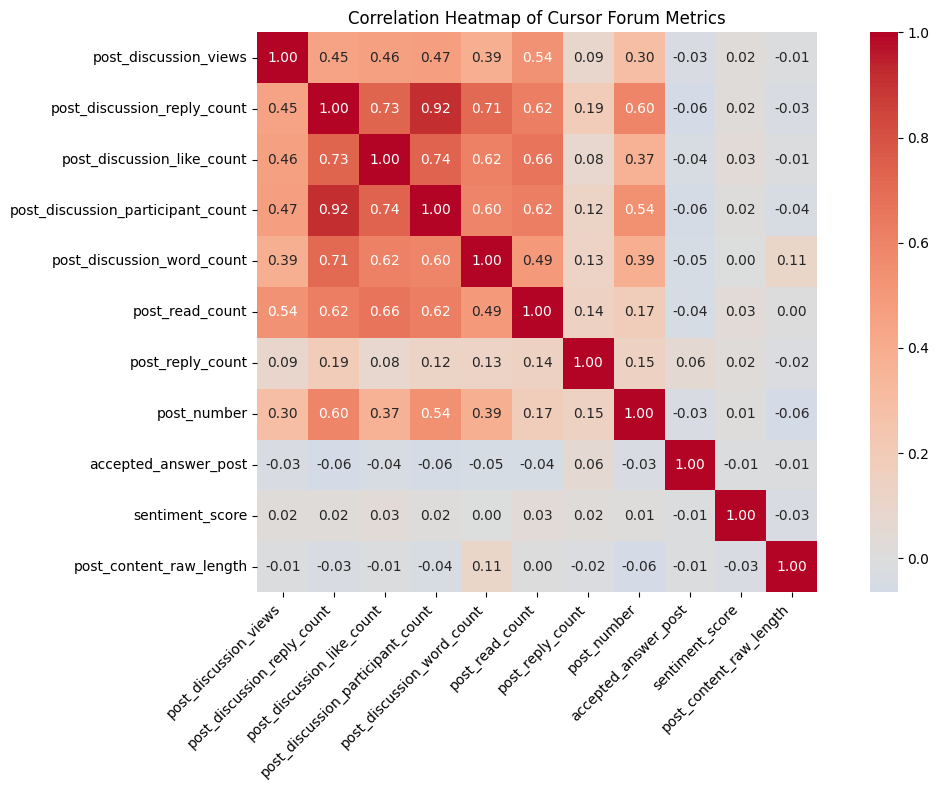


Strongest correlations:
post_discussion_reply_count vs post_discussion_participant_count: 0.916
post_discussion_like_count vs post_discussion_participant_count: 0.737
post_discussion_reply_count vs post_discussion_like_count: 0.730
post_discussion_reply_count vs post_discussion_word_count: 0.710
post_discussion_like_count vs post_read_count: 0.664
post_discussion_participant_count vs post_read_count: 0.618
post_discussion_reply_count vs post_read_count: 0.617
post_discussion_like_count vs post_discussion_word_count: 0.615
post_discussion_participant_count vs post_discussion_word_count: 0.597
post_discussion_reply_count vs post_number: 0.595


In [23]:
# Correlation Analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# First, let's see what features we have
print("Total features:", df.columns.__len__())

# Create a copy for analysis
og_df = df.copy(deep=True)

# Select only truly numerical columns
numerical_columns = [
    'post_discussion_views',
    'post_discussion_reply_count',
    'post_discussion_like_count',
    'post_discussion_participant_count',
    'post_discussion_word_count',
    'post_read_count',
    'post_reply_count',
    'post_number',
    'accepted_answer_post',
    'sentiment_score',  # Using the score, not the dictionary
    'post_content_raw_length'
]

# Create DataFrame with only numerical columns
df_numerical = df[numerical_columns]

# Print the columns we'll analyze
print("\nAnalyzing correlations between these features:")
print(df_numerical.columns.tolist())

# Calculate and plot correlation matrix
plt.figure(figsize=(12, 8))
corr = df_numerical.corr()
sns.heatmap(
    corr, 
    annot=True,  # Show correlation values
    cmap="coolwarm",  # Red-blue colormap
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Show 2 decimal places
    square=True  # Make cells square
)

plt.title("Correlation Heatmap of Cursor Forum Metrics")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust plot margins
plt.show()

# Print strongest correlations
print("\nStrongest correlations:")
# Get upper triangle of correlations
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Stack and sort
strongest_corr = (
    upper.stack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Print top 10 correlations
for idx, value in strongest_corr[:10].items():
    print(f"{idx[0]} vs {idx[1]}: {value:.3f}")

### Volume of Posts Over Time


/var/folders/hg/xlym54ps011_3xj339xh45fr0000gn/T/ipykernel_78241/474705622.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['post_created_at'].dt.to_period('M')


<Figure size 1400x800 with 0 Axes>

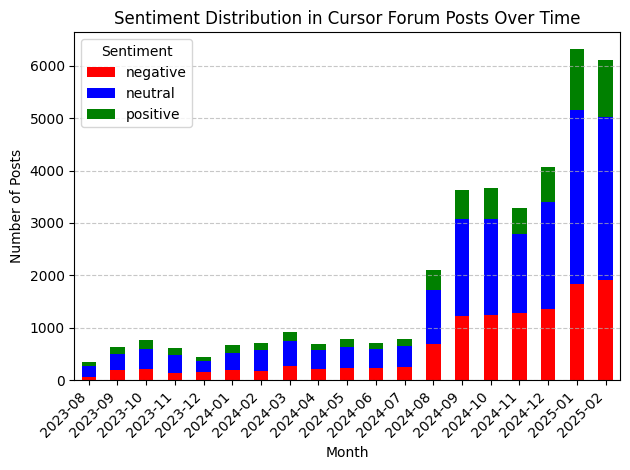


Sentiment Statistics:

Total posts per month:
year_month
2023-08     338
2023-09     640
2023-10     765
2023-11     609
2023-12     437
2024-01     662
2024-02     709
2024-03     915
2024-04     683
2024-05     780
2024-06     700
2024-07     776
2024-08    2093
2024-09    3629
2024-10    3671
2024-11    3291
2024-12    4071
2025-01    6323
2025-02    6102
Freq: M, dtype: int64

Sentiment proportions by month:
sentiment_label  negative  neutral  positive
year_month                                  
2023-08              0.18     0.62      0.20
2023-09              0.29     0.50      0.21
2023-10              0.27     0.52      0.22
2023-11              0.22     0.56      0.22
2023-12              0.35     0.48      0.17
2024-01              0.28     0.51      0.21
2024-02              0.26     0.57      0.18
2024-03              0.29     0.53      0.19
2024-04              0.31     0.53      0.16
2024-05              0.29     0.52      0.18
2024-06              0.32     0.53      0.1

In [24]:
# Time-based Sentiment Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Convert post_created_at to datetime and create year_month column
df['post_created_at'] = pd.to_datetime(df['post_created_at'])
df['year_month'] = df['post_created_at'].dt.to_period('M')

# Count sentiment labels by month
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
sentiment_label_counts_by_month = (
    df.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)
)

# Calculate proportions
total_posts_per_month = sentiment_label_counts_by_month.sum(axis=1)
sentiment_label_proportions_by_month = sentiment_label_counts_by_month.divide(
    total_posts_per_month, axis=0
)

# Create stacked bar plot
plt.figure(figsize=(14, 8))
sentiment_label_counts_by_month.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in sentiment_label_counts_by_month.columns],
)

plt.title('Sentiment Distribution in Cursor Forum Posts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print("\nSentiment Statistics:")
print("\nTotal posts per month:")
print(total_posts_per_month)

print("\nSentiment proportions by month:")
print(sentiment_label_proportions_by_month.round(2))

# Calculate overall sentiment distribution
print("\nOverall sentiment distribution:")
sentiment_distribution = df['sentiment_label'].value_counts(normalize=True)
for sentiment, proportion in sentiment_distribution.items():
    print(f"{sentiment}: {proportion:.1%}")

### Average Sentiment Over Time

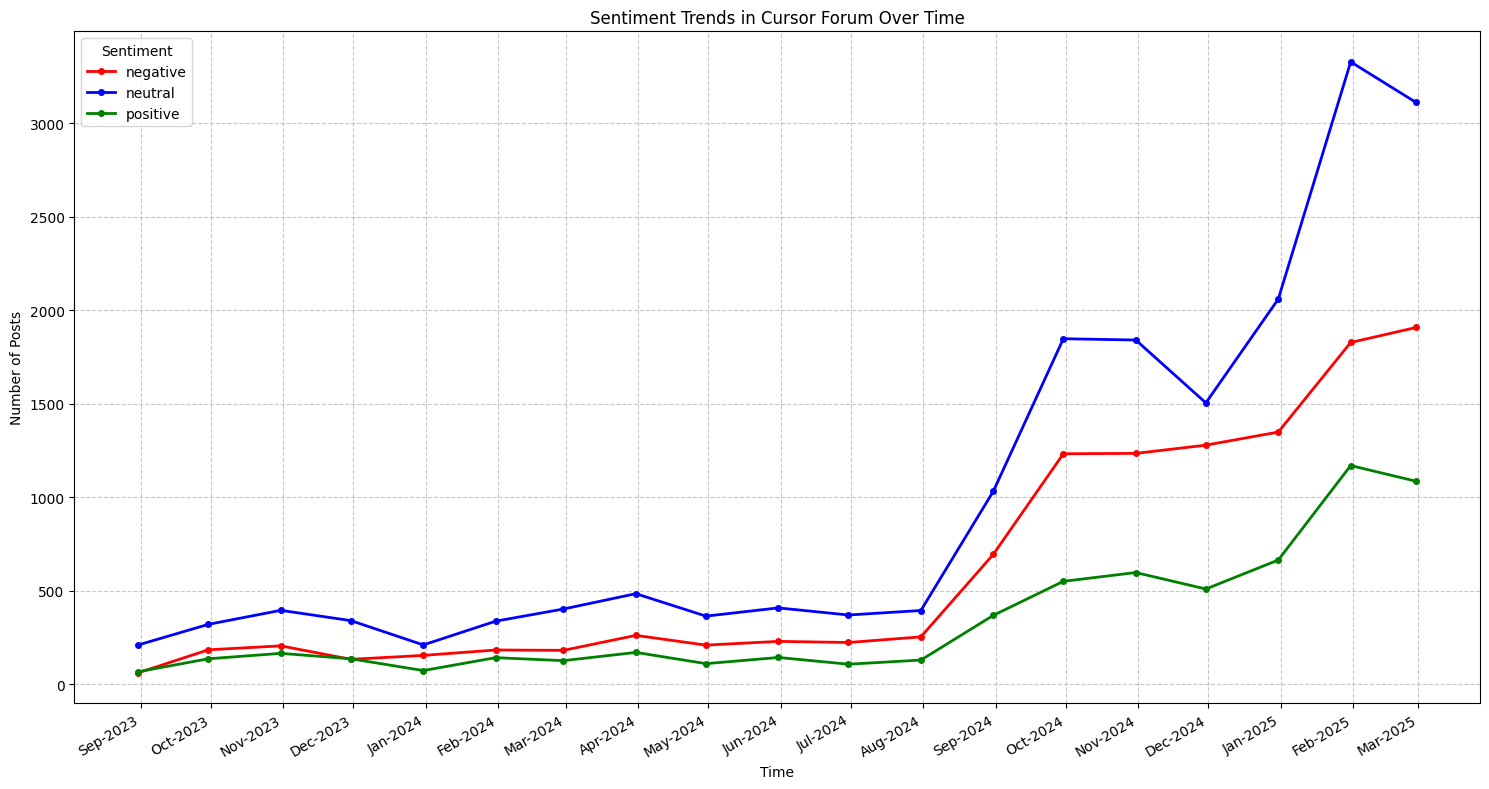


Sentiment Trends Summary:

Peak months for each sentiment:
negative: February 2025 with 1907 posts
neutral: January 2025 with 3327 posts
positive: January 2025 with 1169 posts

Monthly averages:
sentiment_label
negative    620.8
neutral     997.5
positive    339.3
dtype: float64


In [25]:
# Average Sentiment Over Time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reset index if it was set before
df = df.reset_index()

# Convert to datetime if not already
df['post_created_at'] = pd.to_datetime(df['post_created_at'])

# Set the post_created_at column as the index
df.set_index('post_created_at', inplace=True)

# Create monthly sentiment counts
monthly_sentiment = (
    df.resample('ME')['sentiment_label'].value_counts().unstack(fill_value=0)
)

# Define colors for sentiment
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}

# Create the plot
plt.figure(figsize=(15, 8))

# Plot lines for each sentiment
for sentiment in monthly_sentiment.columns:
    plt.plot(
        monthly_sentiment.index, 
        monthly_sentiment[sentiment], 
        color=colors[sentiment],
        label=sentiment,
        marker='o',  # Add markers for data points
        markersize=4,
        linewidth=2
    )

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month

# Improve x-axis labels readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.title('Sentiment Trends in Cursor Forum Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Posts')

# Add legend
plt.legend(title='Sentiment')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some insights
print("\nSentiment Trends Summary:")
print("\nPeak months for each sentiment:")
for sentiment in monthly_sentiment.columns:
    peak_month = monthly_sentiment[sentiment].idxmax()
    peak_count = monthly_sentiment[sentiment].max()
    print(f"{sentiment}: {peak_month.strftime('%B %Y')} with {peak_count} posts")

print("\nMonthly averages:")
print(monthly_sentiment.mean().round(1))